#Breast Cancer Prediction
Adapted from https://medium.com/swlh/predicting-breast-cancer-using-logistic-regression-3cbb796ab931

The data set contains the following features:

* id (patientid)
* name
* radius (the distance from the center to the circumference of the tumor)
* texture (standard deviation of gray-scale values)
* perimeter (circumference of the tumor, approx. 2*3.14 *radius)
* area
* smoothness (local variation in radius lengths)
* compactness
* concavity (severity of concave portions of the contour)
* symmetry
* fractal_dimension
* age
* diagnosis: 0 or 1 indicating whether patient has breast cancer or not

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
dataset_path = '/content/drive/MyDrive/STMKG/Pertemuan 5/breastcancer.csv'

df_original = pd.read_csv(dataset_path)
df_original.sample(5)

,id,name,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
192,ID875099,Therine Gleykin,9.72,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.1653,0.06447,55,0
496,ID914366,Emilee Dionysius,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.1641,0.06854,62,0
299,ID892399,Noami Thatcher,10.51,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.1695,0.06556,33,0
410,ID905502,Kylynn Montagna,11.36,17.57,72.49,399.8,0.08858,0.05313,0.02783,0.1601,0.05913,25,0
491,ID91376702,Emyle Ruskin,17.85,13.23,114.60,992.1,0.07838,0.06217,0.04445,0.1220,0.05243,27,0


In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    object 
 1   name               569 non-null    object 
 2   radius             498 non-null    float64
 3   texture            569 non-null    float64
 4   perimeter          569 non-null    float64
 5   area               569 non-null    float64
 6   smoothness         569 non-null    float64
 7   compactness        569 non-null    float64
 8   concavity          569 non-null    float64
 9   symmetry           569 non-null    float64
 10  fractal_dimension  569 non-null    float64
 11  age                569 non-null    int64  
 12  diagnosis          569 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 57.9+ KB


In [ ]:
# create a copy of the dataframe
df = df_original.copy()

## EDA (simple)

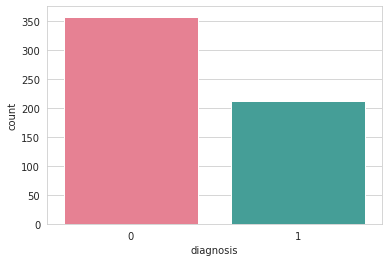

In [ ]:
# count each diagnosis and visualize using countplot
sns.set_style("whitegrid")
sns.countplot(data=df, x='diagnosis', palette='husl')

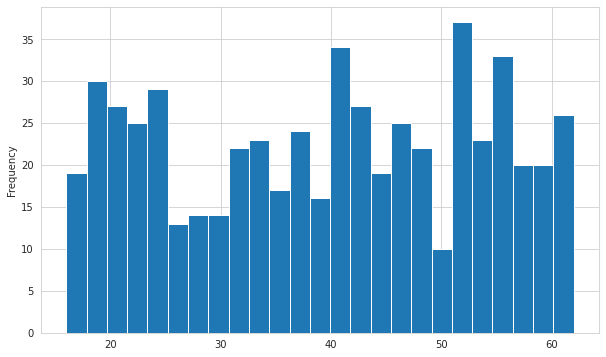

In [ ]:
# check age distribution using histogram
df['age'].plot.hist(bins=25, figsize=(10,6))

## Data Cleaning
Assumption: all datas are in the right format.

In [ ]:
# check for missing values
df.isna().sum()

id                    0
name                  0
radius               71
texture               0
perimeter             0
area                  0
smoothness            0
compactness           0
concavity             0
symmetry              0
fractal_dimension     0
age                   0
diagnosis             0
dtype: int64

In [ ]:
# drop rows with null values
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# check for missing values
df.isna().sum()

id                   0
name                 0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
symmetry             0
fractal_dimension    0
age                  0
diagnosis            0
dtype: int64

In [ ]:
# drop non-numerical features
df.drop(['id', 'name'], axis=1, inplace=True)
df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667,27,1
1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999,31,1
2,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883,20,1
3,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.1794,0.05742,38,1
4,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.1528,0.05697,51,1


## Building the model

In [ ]:
# define the features and target variable
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [ ]:
X.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age
0,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667,27
1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999,31
2,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883,20
3,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.1794,0.05742,38
4,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.1528,0.05697,51


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [ ]:
# split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

398
100
398
100


In [ ]:
# define and train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# make predictions
predictions = model.predict(X_test)

## Evaluation

In [ ]:
# classification report
clf_report = classification_report(y_test, predictions)
print(clf_report)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.88      0.97      0.92        37

    accuracy                           0.94       100
   macro avg       0.93      0.95      0.94       100
weighted avg       0.94      0.94      0.94       100



In [ ]:
# function to make pretty confusion matrix
def plot_cm(cm, classes, figname,
            normalize=False,
            title='Confusion Matrix',
            cmap=plt.cm.Blues):
         
         import numpy as np
         import matplotlib.pyplot as plt
         import itertools
         
         if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print('Normalized confusion matrix')
         else:
            print('Confusion matrix, without normalization')
         
         plt.figure(figsize=(8,8))
         plt.imshow(cm, interpolation='nearest', cmap=cmap)
         plt.title(title)
         #plt.colorbar()
         tick_marks = np.arange(len(classes))
         plt.xticks(tick_marks, classes, rotation=90)
         plt.yticks(tick_marks, classes)
         
         fmt ='.2f' if normalize else 'd'
         thresh = cm.max() / 2.
         for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")
         
         plt.ylabel('True label')
         plt.xlabel('Predicted label')
         plt.tight_layout()
         plt.savefig(figname)

Confusion matrix, without normalization


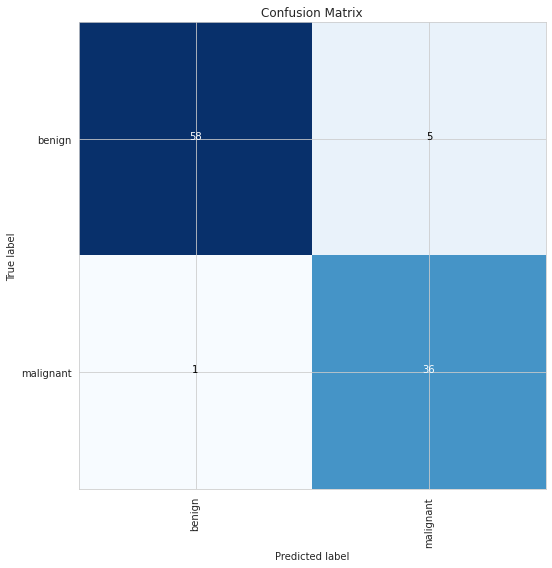

In [ ]:
# confusion matrix (not normalized)
conf_mat = confusion_matrix(y_test, predictions)
category_names = ['benign', 'malignant']
figname = 'Confusion Matrix'

plot_cm(conf_mat, category_names, figname)

Normalized confusion matrix


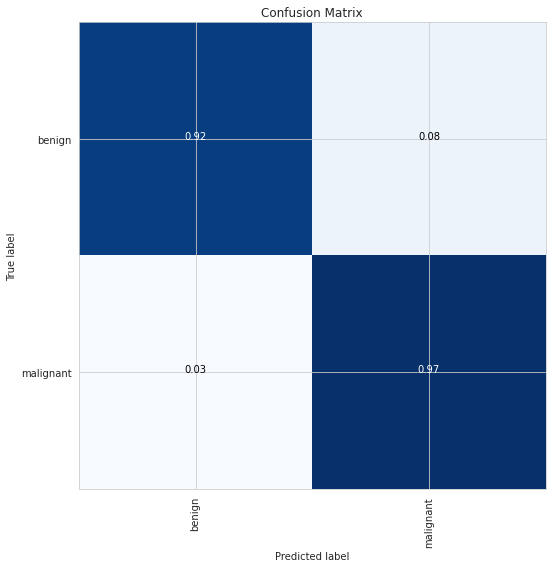

In [ ]:
# confusion matrix (normalized)
plot_cm(conf_mat, category_names, figname, True)